# Analysis of Eviction in US Counties & ML Model to Predict Eviction rate.

Importing Libraries
----

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import svm
from sklearn import linear_model


from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import make_scorer, r2_score, explained_variance_score, mean_absolute_error, mean_squared_error 

#setting max number of columns to display == 25 in pandas options.
pd.options.display.max_columns = 30

importing dataset 'counties_us.csv'
---

In [2]:
counties_us = pd.read_csv("counties_us.csv")
counties_us = counties_us.drop('Unnamed: 0', axis = 1)

In [3]:
counties_us.head()

,year,county,state,population,poverty_rate,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,eviction_filings,evictions,eviction_rate,eviction_filing_rate
0,2001,Aleutians East Borough,Alaska,2697.0,21.83,225.0,41.83,710.0,47875.0,99500.0,18.6,19.32,1.56,12.57,37.04,26.40,0.30,2.71,0.11,NaN,NaN,NaN,NaN
1,2002,Aleutians East Borough,Alaska,2697.0,21.83,230.0,41.83,710.0,47875.0,99500.0,18.6,19.32,1.56,12.57,37.04,26.40,0.30,2.71,0.11,NaN,NaN,NaN,NaN
2,2003,Aleutians East Borough,Alaska,2697.0,21.83,234.0,41.83,710.0,47875.0,99500.0,18.6,19.32,1.56,12.57,37.04,26.40,0.30,2.71,0.11,NaN,NaN,NaN,NaN
3,2004,Aleutians East Borough,Alaska,2697.0,21.83,239.0,41.83,710.0,47875.0,99500.0,18.6,19.32,1.56,12.57,37.04,26.40,0.30,2.71,0.11,NaN,NaN,NaN,NaN
4,2005,Aleutians East Borough,Alaska,2959.0,8.37,244.0,58.59,654.0,56250.0,122100.0,18.0,9.97,9.83,9.50,17.17,47.48,0.34,5.58,0.14,NaN,NaN,NaN,NaN


In [4]:
#column names of data

Col_list = counties_us.columns.tolist()

Col_list

['year',
 'county',
 'state',
 'population',
 'poverty_rate',
 'renter_occupied_households',
 'pct_renter_occupied',
 'median_gross_rent',
 'median_household_income',
 'median_property_value',
 'rent_burden',
 'pct_white',
 'pct_af_am',
 'pct_hispanic',
 'pct_am_ind',
 'pct_asian',
 'pct_nh_pi',
 'pct_multiple',
 'pct_other',
 'eviction_filings',
 'evictions',
 'eviction_rate',
 'eviction_filing_rate']

In [5]:
#col data types
#sorting by type for simple vision and understanding

counties_us.dtypes.sort_values()

year                            int64
evictions                     float64
eviction_filings              float64
pct_other                     float64
pct_multiple                  float64
pct_nh_pi                     float64
pct_asian                     float64
pct_am_ind                    float64
pct_hispanic                  float64
pct_af_am                     float64
eviction_rate                 float64
pct_white                     float64
median_property_value         float64
median_household_income       float64
median_gross_rent             float64
pct_renter_occupied           float64
renter_occupied_households    float64
poverty_rate                  float64
population                    float64
rent_burden                   float64
eviction_filing_rate          float64
state                          object
county                         object
dtype: object

>We have 1 int type, 20 float type and 2 object type variables.

Data Dictionary:
----

In [6]:
col_meaning_list = [ "The year of which the recorded information belongs to.",
"Census location name (modified for display on map)", 
"Parent location of given geography.- USA for states, state for counties and cities, counties for tracts and block groups", 
"Total population of the county for the corresponding year.", 
"% of the population with income in the past 12 months below the poverty level", 
"Interpolated count of renter-occupied households - Based on Census and ESRI Business Analyst demographic estimates", 
"% of occupied housing units that are renter-occupied. - NOTE: This is not based off of the interpolated renter-occupied-households variable", 
"Median gross rent", 
"Median household income",
"Median property value",
"Median gross rent as a percentage of household income, max is 50% representing >= 50%", 
"% population that is White alone and not Hispanic or Latino", 
"% population that is Black or African American alone and not Hispanic or Latino",
"% population that is of Hispanic or Latino origin",
"% population that is American Indian and Alaska Native alone and not Hispanic or Latino",
"% population that is Asian alone and not Hispanic or Latino",
"% population that is Native Hawaiian and Other Pacific Islander alone and not Hispanic or Latino",  
"% population that is two or more races and not Hispanic or Latino",
"% population that is other race alone and not Hispanic or Latino",
"All eviction cases filed in an area, including multiple cases filed against the same address in the same year",                    
"Number of eviction judgments in which renters were ordered to leave in a given area and year  - Only counts a single address which received an eviction judgment per year",
"Ratio of the number of renter-occupied households in an area that received an eviction judgement in which renters were ordered to leave - Only counts a single address per year which received an eviction judgment",
"Ratio of the number of evictions filed in an area over the number of renter-occupied homes in that area - Counts all eviction cases filed in an area, including multiple cases filed against the same address in the same year"]

In [7]:
data_dict = {}

for i in range(len(Col_list)):
    data_dict[Col_list[i]] = col_meaning_list[i]
    
data_dict   

{'year': 'The year of which the recorded information belongs to.',
 'county': 'Census location name (modified for display on map)',
 'state': 'Parent location of given geography.- USA for states, state for counties and cities, counties for tracts and block groups',
 'population': 'Total population of the county for the corresponding year.',
 'poverty_rate': '% of the population with income in the past 12 months below the poverty level',
 'renter_occupied_households': 'Interpolated count of renter-occupied households - Based on Census and ESRI Business Analyst demographic estimates',
 'pct_renter_occupied': '% of occupied housing units that are renter-occupied. - NOTE: This is not based off of the interpolated renter-occupied-households variable',
 'median_gross_rent': 'Median gross rent',
 'median_household_income': 'Median household income',
 'median_property_value': 'Median property value',
 'rent_burden': 'Median gross rent as a percentage of household income, max is 50% representin

In [8]:
#what is 'county'?

data_dict['county']

'Census location name (modified for display on map)'

In [9]:
#what is evictions?

data_dict['evictions']

'Number of eviction judgments in which renters were ordered to leave in a given area and year  - Only counts a single address which received an eviction judgment per year'

Summary Statistics Of Data
----

In [10]:
# setting decimal values in pandas to .2f

pd.options.display.float_format = "{:,.2f}".format

counties_us.describe(include='all')

,year,county,state,population,poverty_rate,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,eviction_filings,evictions,eviction_rate,eviction_filing_rate
count,"53,435.00",53435,53435,"53,414.00","53,414.00","53,430.00","53,414.00","53,403.00","53,408.00","53,396.00","53,404.00","53,414.00","53,414.00","53,414.00","53,414.00","53,414.00","53,414.00","53,414.00","53,414.00","44,167.00","41,338.00","41,338.00","44,167.00"
unique,nan,1878,51,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,nan,Washington County,Texas,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,nan,510,4318,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,"2,008.00",NaN,NaN,"95,896.38",12.53,"12,741.01",27.32,596.17,"42,399.47","117,873.02",26.76,79.10,8.78,7.63,1.78,1.07,0.08,1.47,0.09,835.53,373.98,1.68,3.01
std,4.90,NaN,NaN,"309,640.49",6.09,"50,849.04",8.01,199.36,"12,085.51","77,538.04",4.77,19.59,14.40,12.88,7.38,2.43,0.75,1.55,0.16,"4,278.98","1,542.80",1.98,4.92
min,"2,000.00",NaN,NaN,67.00,0.00,5.00,7.35,178.00,"9,333.00",0.00,8.10,0.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"2,004.00",NaN,NaN,"11,031.00",8.23,"1,049.00",21.99,461.00,"34,038.00","74,200.00",23.50,68.17,0.42,1.31,0.15,0.20,0.00,0.72,0.00,3.00,3.00,0.32,0.35
50%,"2,008.00",NaN,NaN,"25,421.00",11.52,"2,552.00",25.94,570.00,"40,674.00","96,000.00",26.70,86.54,1.93,2.78,0.28,0.44,0.01,1.14,0.04,30.00,25.00,1.11,1.45
75%,"2,012.00",NaN,NaN,"64,886.00",15.50,"7,147.00",31.15,685.00,"48,383.00","137,400.00",29.80,94.52,10.00,7.29,0.64,0.98,0.04,1.73,0.11,210.00,140.00,2.31,3.55


In [11]:
#summary stats for numeric variables

counties_us.describe()

,year,population,poverty_rate,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,eviction_filings,evictions,eviction_rate,eviction_filing_rate
count,"53,435.00","53,414.00","53,414.00","53,430.00","53,414.00","53,403.00","53,408.00","53,396.00","53,404.00","53,414.00","53,414.00","53,414.00","53,414.00","53,414.00","53,414.00","53,414.00","53,414.00","44,167.00","41,338.00","41,338.00","44,167.00"
mean,"2,008.00","95,896.38",12.53,"12,741.01",27.32,596.17,"42,399.47","117,873.02",26.76,79.10,8.78,7.63,1.78,1.07,0.08,1.47,0.09,835.53,373.98,1.68,3.01
std,4.90,"309,640.49",6.09,"50,849.04",8.01,199.36,"12,085.51","77,538.04",4.77,19.59,14.40,12.88,7.38,2.43,0.75,1.55,0.16,"4,278.98","1,542.80",1.98,4.92
min,"2,000.00",67.00,0.00,5.00,7.35,178.00,"9,333.00",0.00,8.10,0.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"2,004.00","11,031.00",8.23,"1,049.00",21.99,461.00,"34,038.00","74,200.00",23.50,68.17,0.42,1.31,0.15,0.20,0.00,0.72,0.00,3.00,3.00,0.32,0.35
50%,"2,008.00","25,421.00",11.52,"2,552.00",25.94,570.00,"40,674.00","96,000.00",26.70,86.54,1.93,2.78,0.28,0.44,0.01,1.14,0.04,30.00,25.00,1.11,1.45
75%,"2,012.00","64,886.00",15.50,"7,147.00",31.15,685.00,"48,383.00","137,400.00",29.80,94.52,10.00,7.29,0.64,0.98,0.04,1.73,0.11,210.00,140.00,2.31,3.55
max,"2,016.00","10,038,388.00",56.92,"1,792,186.00",100.00,"2,001.00","123,453.00","1,000,001.00",50.10,100.00,86.76,98.71,94.95,47.48,48.89,33.33,4.90,"143,753.00","47,716.00",24.16,118.62


In [12]:
#summary stats for object type data

counties_us.describe(include = 'object')

,county,state
count,53435,53435
unique,1878,51
top,Washington County,Texas
freq,510,4318


In [13]:
counties_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53435 entries, 0 to 53434
Data columns (total 23 columns):
year                          53435 non-null int64
county                        53435 non-null object
state                         53435 non-null object
population                    53414 non-null float64
poverty_rate                  53414 non-null float64
renter_occupied_households    53430 non-null float64
pct_renter_occupied           53414 non-null float64
median_gross_rent             53403 non-null float64
median_household_income       53408 non-null float64
median_property_value         53396 non-null float64
rent_burden                   53404 non-null float64
pct_white                     53414 non-null float64
pct_af_am                     53414 non-null float64
pct_hispanic                  53414 non-null float64
pct_am_ind                    53414 non-null float64
pct_asian                     53414 non-null float64
pct_nh_pi                     53414 non-null fl

In [14]:
counties_us['state'].nunique()

51

There are 51 labels in the states attribute, it is because the data also included the 'District of Columbia' - a federal district.

Exploratory Data Analysis
--------

>Missing Value Analysis
>---------------

Looking for null values

In [15]:
counties_us.isnull().sum()

year                              0
county                            0
state                             0
population                       21
poverty_rate                     21
renter_occupied_households        5
pct_renter_occupied              21
median_gross_rent                32
median_household_income          27
median_property_value            39
rent_burden                      31
pct_white                        21
pct_af_am                        21
pct_hispanic                     21
pct_am_ind                       21
pct_asian                        21
pct_nh_pi                        21
pct_multiple                     21
pct_other                        21
eviction_filings               9268
evictions                     12097
eviction_rate                 12097
eviction_filing_rate           9268
dtype: int64

From the above, we can see that the data has 12097 null values under the attribute 'evictions', 'eviction_filings', 'eviction_rate' and 'eviction_filing_rate'. And less than 50 missing values under all other attributes except year, county and state attributes.

In [16]:
(counties_us.isnull().sum()/counties_us.shape[0] *100).round(2)

year                          0.00
county                        0.00
state                         0.00
population                    0.04
poverty_rate                  0.04
renter_occupied_households    0.01
pct_renter_occupied           0.04
median_gross_rent             0.06
median_household_income       0.05
median_property_value         0.07
rent_burden                   0.06
pct_white                     0.04
pct_af_am                     0.04
pct_hispanic                  0.04
pct_am_ind                    0.04
pct_asian                     0.04
pct_nh_pi                     0.04
pct_multiple                  0.04
pct_other                     0.04
eviction_filings             17.34
evictions                    22.64
eviction_rate                22.64
eviction_filing_rate         17.34
dtype: float64

The above gives us the understanding of the portion of missing values under each attribute in %'s.
>Only 'evictions', 'eviction_filings', 'eviction_rate' and 'eviction_filing_rate' has around 17% - 23% of missing values and the remaining have negligible missing value portion. 

Handling Missing Values:
>> 'evictions' is the target variable, so we are not going to impute the missing values in this.
>>> lets drop the rows with missing values in 'evictions'.

>> All other attribute have negligible percentage of missing values. 
>>>So we can drop them, that wont be effecting our study.

In [17]:
counties_us.shape

(53435, 23)

In [18]:
counties_us.dropna(how = 'any', inplace = True)

In [19]:
counties_us.shape

(41298, 23)

In [20]:
(counties_us.isnull().sum()/counties_us.shape[0] *100).round(2)

year                         0.00
county                       0.00
state                        0.00
population                   0.00
poverty_rate                 0.00
renter_occupied_households   0.00
pct_renter_occupied          0.00
median_gross_rent            0.00
median_household_income      0.00
median_property_value        0.00
rent_burden                  0.00
pct_white                    0.00
pct_af_am                    0.00
pct_hispanic                 0.00
pct_am_ind                   0.00
pct_asian                    0.00
pct_nh_pi                    0.00
pct_multiple                 0.00
pct_other                    0.00
eviction_filings             0.00
evictions                    0.00
eviction_rate                0.00
eviction_filing_rate         0.00
dtype: float64

Now, we dont have missing values in our data.

>Outlier Analysis
>----

C:\Users\veere\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


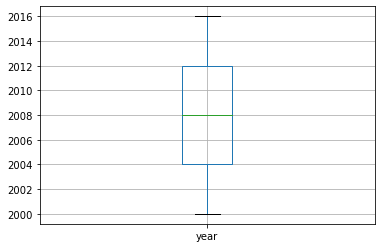

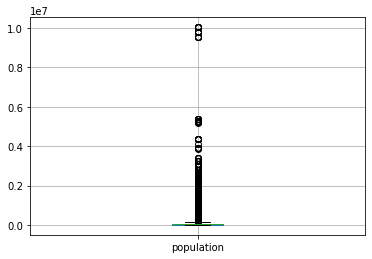

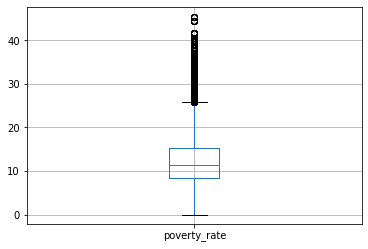

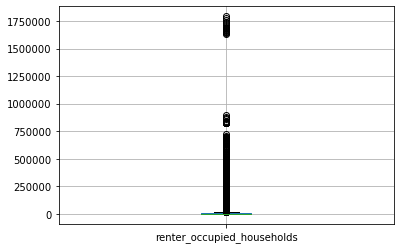

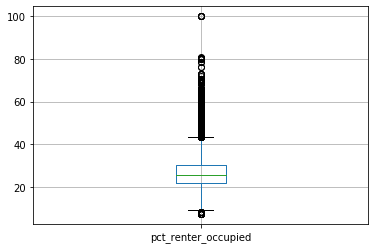

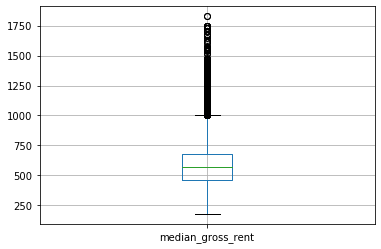

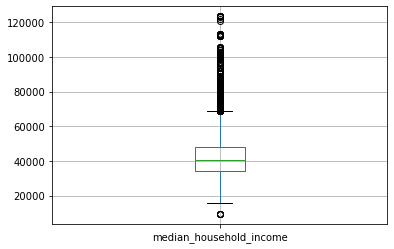

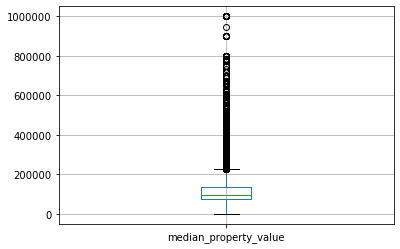

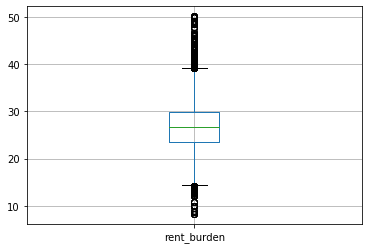

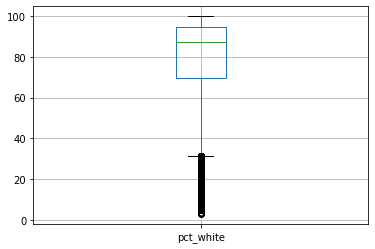

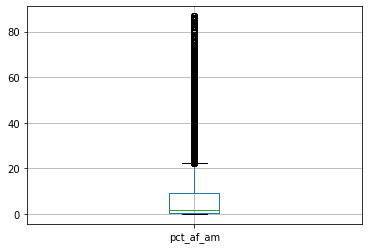

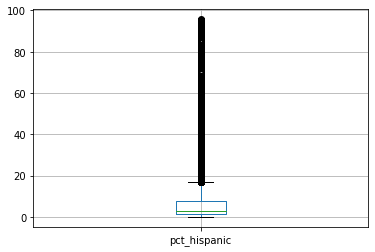

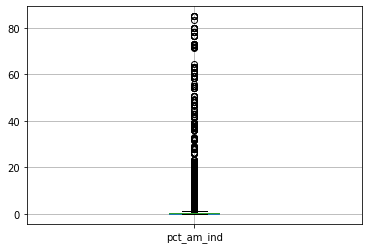

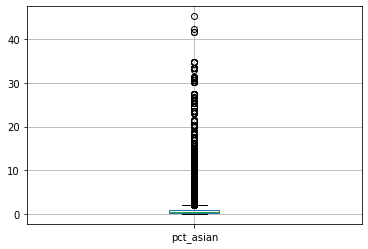

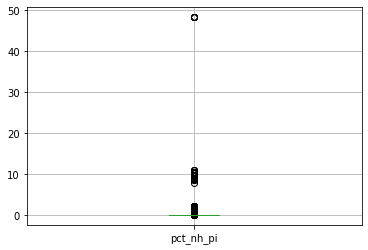

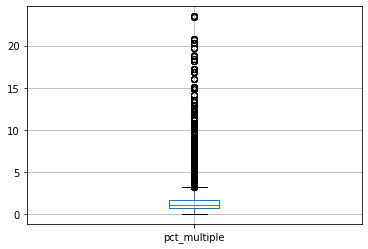

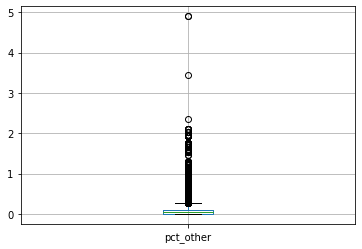

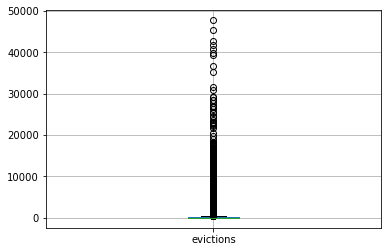

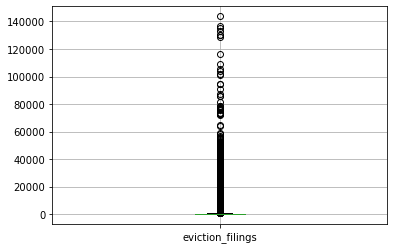

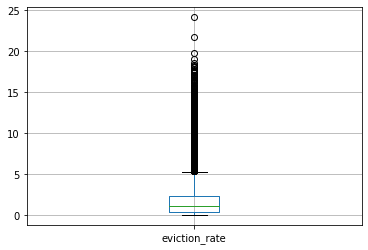

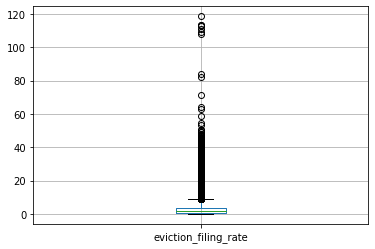

In [21]:
num_col = ['year','population','poverty_rate','renter_occupied_households','pct_renter_occupied',\
           'median_gross_rent','median_household_income','median_property_value','rent_burden',\
           'pct_white','pct_af_am','pct_hispanic','pct_am_ind','pct_asian','pct_nh_pi','pct_multiple',\
           'pct_other','evictions','eviction_filings', 'eviction_rate', 'eviction_filing_rate']
for col in num_col:
    plt.figure()
    counties_us.boxplot([col])

As, we see the boxplot shows that almost all numeric_attributes have outliers in them.

Outliers Treatement:

In [22]:
#This function will take dataframe name, the col name for which you want to \n
# check outlier and will return the rows of the df which are outliers
def outlier(df, x):
    #x = input("col name:")
    q1 = df[x].quantile(.25)
    q3 = df[x].quantile(.75)
    iqr = q3 - q1
    max_lim = q3 + 1.5*iqr
    min_lim = q1 - 1.5*iqr
    print('Q1 = ', q1)
    print('Q2 = ', np.median(df[x]))
    print('Q3 = ', q3)
    print("max_lim =", max_lim)
    print("min_lim =", min_lim)
    return df[(df[x] > max_lim)| (df[x] < min_lim)]

In [23]:
#Population

outlier(counties_us, 'population')

Q1 =  10445.0
Q2 =  23511.0
Q3 =  62683.0
max_lim = 141040.0
min_lim = -67912.0


,year,county,state,population,poverty_rate,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,eviction_filings,evictions,eviction_rate,eviction_filing_rate
513,2005,Baldwin County,Alabama,"171,997.00",8.84,"15,715.00",22.54,788.00,"48,918.00","173,100.00",29.60,85.11,9.80,2.90,0.56,0.57,0.00,0.99,0.07,500.00,268.00,1.71,3.18
514,2006,Baldwin County,Alabama,"171,997.00",8.84,"16,593.00",22.54,788.00,"48,918.00","173,100.00",29.60,85.11,9.80,2.90,0.56,0.57,0.00,0.99,0.07,512.00,253.00,1.52,3.09
515,2007,Baldwin County,Alabama,"171,997.00",8.84,"17,472.00",22.54,788.00,"48,918.00","173,100.00",29.60,85.11,9.80,2.90,0.56,0.57,0.00,0.99,0.07,605.00,392.00,2.24,3.46
516,2008,Baldwin County,Alabama,"171,997.00",8.84,"18,351.00",22.54,788.00,"48,918.00","173,100.00",29.60,85.11,9.80,2.90,0.56,0.57,0.00,0.99,0.07,671.00,438.00,2.39,3.66
517,2009,Baldwin County,Alabama,"171,997.00",8.84,"19,230.00",22.54,788.00,"48,918.00","173,100.00",29.60,85.11,9.80,2.90,0.56,0.57,0.00,0.99,0.07,626.00,360.00,1.87,3.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53022,2012,Winnebago County,Wisconsin,"169,004.00",6.74,"23,516.00",34.88,678.00,"52,018.00","143,100.00",26.50,89.74,1.94,3.82,0.57,2.43,0.03,1.44,0.04,731.00,493.00,2.10,3.11
53023,2013,Winnebago County,Wisconsin,"169,004.00",6.74,"23,855.00",34.88,678.00,"52,018.00","143,100.00",26.50,89.74,1.94,3.82,0.57,2.43,0.03,1.44,0.04,748.00,525.00,2.20,3.14
53024,2014,Winnebago County,Wisconsin,"169,004.00",6.74,"24,194.00",34.88,678.00,"52,018.00","143,100.00",26.50,89.74,1.94,3.82,0.57,2.43,0.03,1.44,0.04,692.00,466.00,1.93,2.86
53025,2015,Winnebago County,Wisconsin,"169,004.00",6.74,"24,532.00",34.88,678.00,"52,018.00","143,100.00",26.50,89.74,1.94,3.82,0.57,2.43,0.03,1.44,0.04,649.00,432.00,1.76,2.65


We have 5484 rows with outliers under 'population' attribute. We can understand that some places which are developed might have high population compared to other small towns, this can explain the outliers under population column. 

>And these population values are true values. Reference : https://www.census.gov/quickfacts/kanawhacountywestvirginia

So, we dont treate these as outliers.

In [24]:
#poverty_rate

outlier(counties_us, 'poverty_rate')

Q1 =  8.3
Q2 =  11.46
Q3 =  15.3175
max_lim = 25.84375
min_lim = -2.2262500000000003


,year,county,state,population,poverty_rate,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,eviction_filings,evictions,eviction_rate,eviction_filing_rate
525,2000,Barbour County,Alabama,"29,038.00",26.80,"2,797.00",26.87,333.00,"25,101.00","68,600.00",25.10,50.93,46.04,1.65,0.41,0.29,0.02,0.66,0.01,15.00,11.00,0.39,0.54
526,2001,Barbour County,Alabama,"29,038.00",26.80,"2,844.00",26.87,333.00,"25,101.00","68,600.00",25.10,50.93,46.04,1.65,0.41,0.29,0.02,0.66,0.01,37.00,10.00,0.35,1.30
527,2002,Barbour County,Alabama,"29,038.00",26.80,"2,890.00",26.87,333.00,"25,101.00","68,600.00",25.10,50.93,46.04,1.65,0.41,0.29,0.02,0.66,0.01,46.00,14.00,0.48,1.59
528,2003,Barbour County,Alabama,"29,038.00",26.80,"2,937.00",26.87,333.00,"25,101.00","68,600.00",25.10,50.93,46.04,1.65,0.41,0.29,0.02,0.66,0.01,36.00,8.00,0.27,1.23
529,2004,Barbour County,Alabama,"29,038.00",26.80,"2,984.00",26.87,333.00,"25,101.00","68,600.00",25.10,50.93,46.04,1.65,0.41,0.29,0.02,0.66,0.01,48.00,15.00,0.50,1.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52495,2012,Menominee County,Wisconsin,"4,451.00",28.65,392.00,30.50,469.00,"35,343.00","83,500.00",25.80,10.51,0.43,5.53,80.00,2.45,0.00,1.08,0.00,1.00,1.00,0.26,0.26
52496,2013,Menominee County,Wisconsin,"4,451.00",28.65,397.00,30.50,469.00,"35,343.00","83,500.00",25.80,10.51,0.43,5.53,80.00,2.45,0.00,1.08,0.00,1.00,0.00,0.00,0.25
52497,2014,Menominee County,Wisconsin,"4,451.00",28.65,402.00,30.50,469.00,"35,343.00","83,500.00",25.80,10.51,0.43,5.53,80.00,2.45,0.00,1.08,0.00,0.00,0.00,0.00,0.00
52498,2015,Menominee County,Wisconsin,"4,451.00",28.65,408.00,30.50,469.00,"35,343.00","83,500.00",25.80,10.51,0.43,5.53,80.00,2.45,0.00,1.08,0.00,2.00,1.00,0.25,0.49


We have 1236 rows with outliers under 'poverty_rate' attribute. We can understand that some places which are developed might have high oppurtunities for earning and might result in less poverty_rate 
Similarly vice - verse eith undeveloped counties.

This can explain the outliers under 'poverty_rate' column.

In [25]:
data_dict['poverty_rate']

'% of the population with income in the past 12 months below the poverty level'

In [26]:
#renter_occupied_households

outlier(counties_us, 'renter_occupied_households')['county'].nunique()

Q1 =  971.0
Q2 =  2315.0
Q3 =  6845.25
max_lim = 15656.625
min_lim = -7840.375


394

In [27]:
data_dict['renter_occupied_households']

'Interpolated count of renter-occupied households - Based on Census and ESRI Business Analyst demographic estimates'

In [28]:
counties_us.county.nunique()

1673

In [29]:
counties_us.columns.tolist()

['year',
 'county',
 'state',
 'population',
 'poverty_rate',
 'renter_occupied_households',
 'pct_renter_occupied',
 'median_gross_rent',
 'median_household_income',
 'median_property_value',
 'rent_burden',
 'pct_white',
 'pct_af_am',
 'pct_hispanic',
 'pct_am_ind',
 'pct_asian',
 'pct_nh_pi',
 'pct_multiple',
 'pct_other',
 'eviction_filings',
 'evictions',
 'eviction_rate',
 'eviction_filing_rate']

>Data Vizualization
>----

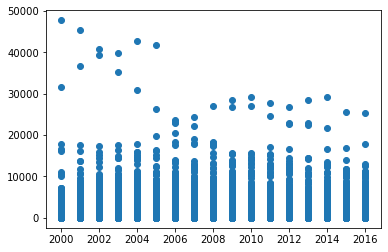

In [30]:
plt.scatter(counties_us['year'], counties_us['evictions'])

In [31]:
def year_class(x):
        if  x >= 2000 and x< 2004:
            return '2000 - 2003'
        elif x >= 2004 and x< 2008:
            return '2004 - 2007'
        elif x >= 2008 and x< 2012:
            return '2008 - 2011'
        else:
            return '2012 - 2016'
        
counties_us['Year_Batch'] = counties_us['year'].map(year_class)        

In [32]:
counties_us['Year_Batch'].unique()

array(['2000 - 2003', '2004 - 2007', '2008 - 2011', '2012 - 2016'],
      dtype=object)

DFs with respect to Year_Batchs
-----

In [33]:
#2000 - 2003

countie_2000_03 = counties_us[counties_us['Year_Batch'] == '2000 - 2003']

In [34]:
#2004 - 2007

countie_2004_07 = counties_us[counties_us['Year_Batch'] == '2004 - 2007']

In [35]:
#2008 - 2011

countie_2008_11 = counties_us[counties_us['Year_Batch'] == '2008 - 2011']

In [36]:
#2012 - 2016

countie_2012_16 = counties_us[counties_us['Year_Batch'] == '2012 - 2016']

#eviction vs Year
-----

<BarContainer object of 41298 artists>

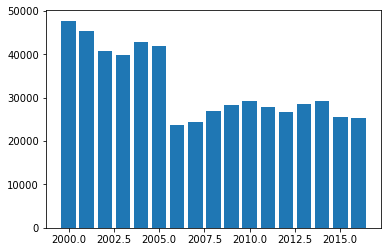

In [37]:
plt.bar(counties_us['year'], counties_us['evictions'])

In [38]:
#eviction_filings in the years 2005 & 2006

In [39]:
counties_2005_06 = counties_us[(counties_us['year'] == 2005) | (counties_us['year'] == 2006)]

counties_2005_06[['county','year','eviction_filings']]

#plt.bar(counties_us['eviction_filing_rate'], counties_2005_06['year'])

,county,year,eviction_filings
496,Autauga County,2005,89.00
497,Autauga County,2006,85.00
513,Baldwin County,2005,500.00
514,Baldwin County,2006,512.00
530,Barbour County,2005,21.00
...,...,...,...
53390,Uinta County,2006,0.00
53406,Washakie County,2005,0.00
53407,Washakie County,2006,0.00
53423,Weston County,2005,6.00


In [40]:
counties_us.groupby('Year_Batch')[['eviction_rate', 'eviction_filing_rate']].mean()

,eviction_rate,eviction_filing_rate
Year_Batch,,
2000 - 2003,1.52,2.76
2004 - 2007,1.78,3.29
2008 - 2011,1.75,3.27
2012 - 2016,1.66,3.40


#evition_rate vs eviction_filing_rate (AVG)
-----

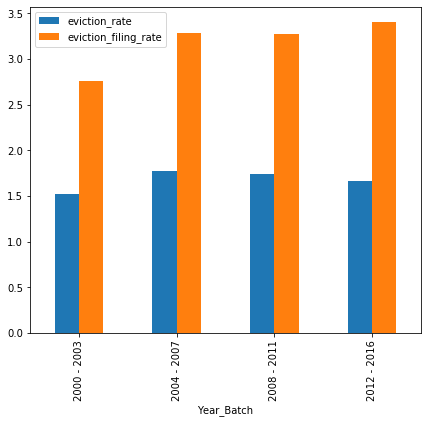

In [41]:
counties_us.groupby('Year_Batch')[['eviction_rate', 'eviction_filing_rate']\
                                ].mean().plot(kind = 'bar', figsize = (7, 6))

We observed, 50% - 60% ratio between eviction_rate and eviction_filing_rate. 

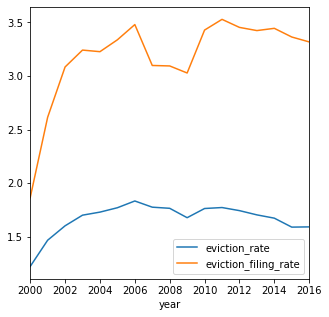

In [42]:
counties_us.groupby('year')[['eviction_rate', 'eviction_filing_rate']\
                                ].mean().plot(kind = 'line', figsize = (5, 5))

#TOP10 county vs eviction_rate
-------

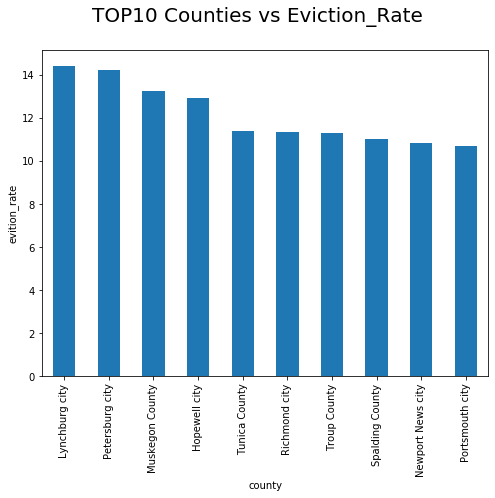

In [43]:
plt.figure(figsize=(15,10))

plt.xticks(rotation=90)

plt.xlabel('Counties')
plt.ylabel('evition_rate')
plt.suptitle('TOP10 Counties vs Eviction_Rate', fontsize=20)

counties_us.groupby('county')['eviction_rate'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar', figsize = (8, 6))

#states vs eviction_filing_rate
-----

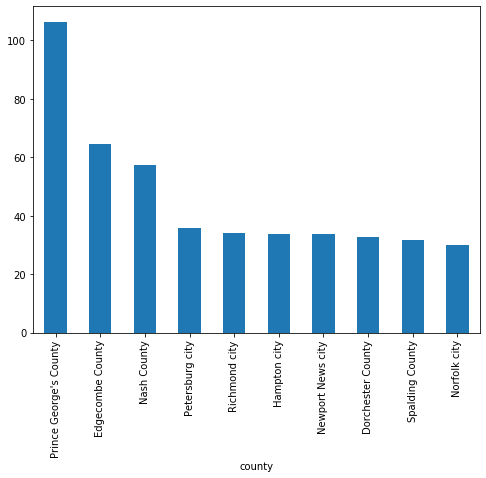

In [44]:
plt.figure(figsize=(15,10))

plt.xticks(rotation=90)

counties_us.groupby('county')['eviction_filing_rate'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar', figsize = (8, 6))

Top 15 counties with low  poverty_rate v/s eviction_rate 
-------

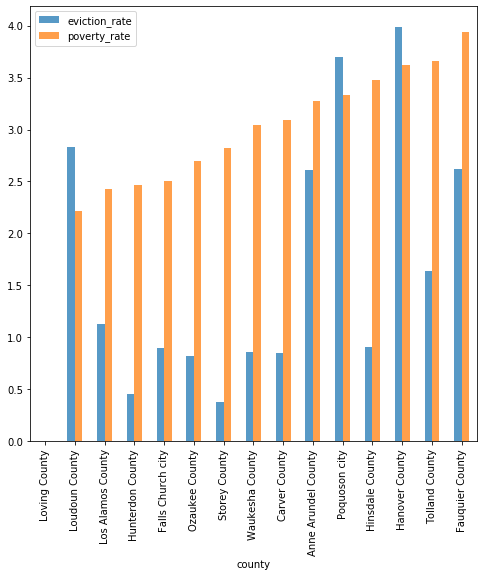

In [45]:
counties_us.groupby('county')[['eviction_rate', 'poverty_rate']].mean().sort_values( 'poverty_rate',ascending = True).head(15).plot(kind = 'bar', figsize = (8, 8), alpha=0.75, rot=90)

Top 15 counties with high poverty_rate v/s eviction_rate
-------

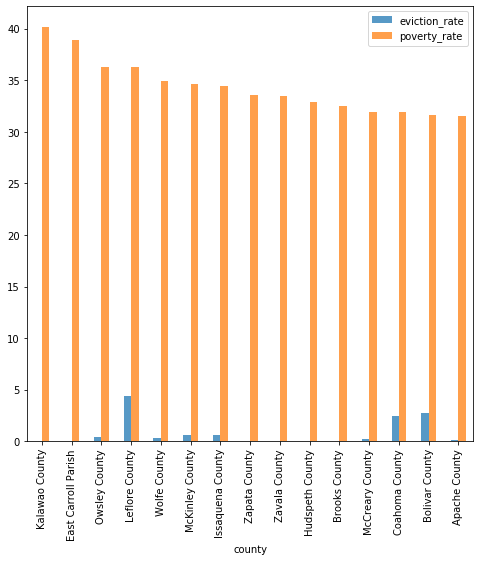

In [46]:
counties_us.groupby('county')[['eviction_rate', 'poverty_rate']].mean().sort_values( 'poverty_rate',ascending = False).head(15).plot(kind = 'bar', figsize = (8, 8), alpha=0.75, rot=90)

Top 10 counties with low eviction_filing_rate vs Races%
----

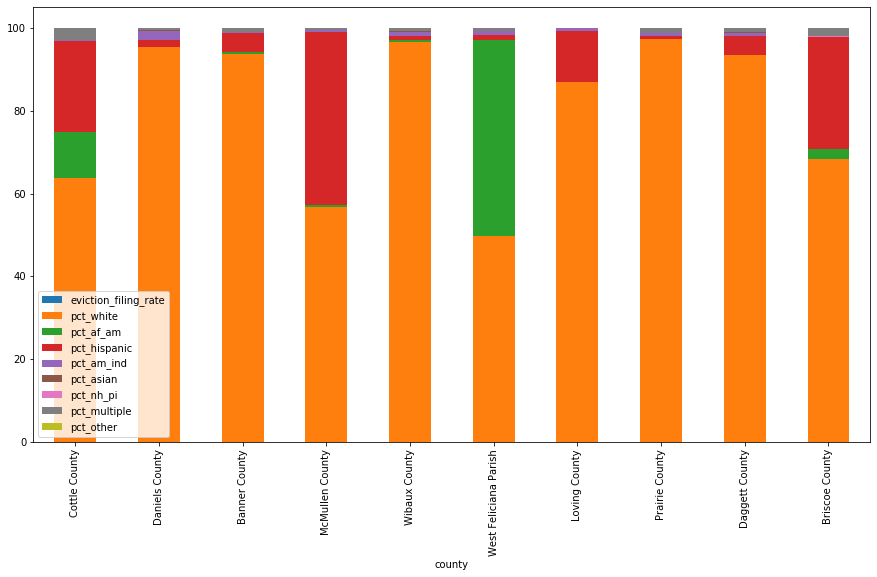

In [47]:
x= counties_us[['county','eviction_filing_rate','pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind', 'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other',]]
y= x.set_index('county')
z=y.groupby('county').mean().sort_values('eviction_filing_rate').head(10)

z.plot.bar(stacked=True, figsize = (15, 8))

Top 10 counties with high eviction_filing_rate vs Races%
-----

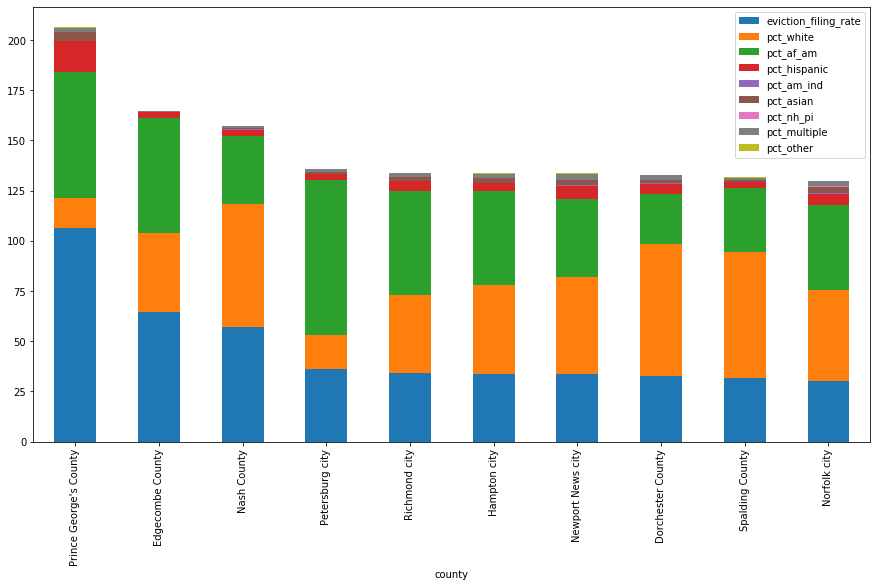

In [48]:
x= counties_us[['county','eviction_filing_rate','pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind', 'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other',]]
y= x.set_index('county')
z=y.groupby('county').mean().sort_values('eviction_filing_rate', ascending = False).head(10)

z.plot.bar(stacked=True, figsize = (15, 8))

In [49]:
counties_us[['county',  'median_gross_rent',
 'median_household_income',
 'median_property_value',
 'rent_burden',]].head()

,county,median_gross_rent,median_household_income,median_property_value,rent_burden
492,Autauga County,537.00,"42,013.00","94,800.00",22.60
493,Autauga County,537.00,"42,013.00","94,800.00",22.60
494,Autauga County,537.00,"42,013.00","94,800.00",22.60
495,Autauga County,537.00,"42,013.00","94,800.00",22.60
496,Autauga County,779.00,"51,463.00","130,700.00",27.20


#meadian_property_value vs Year_Batch
----

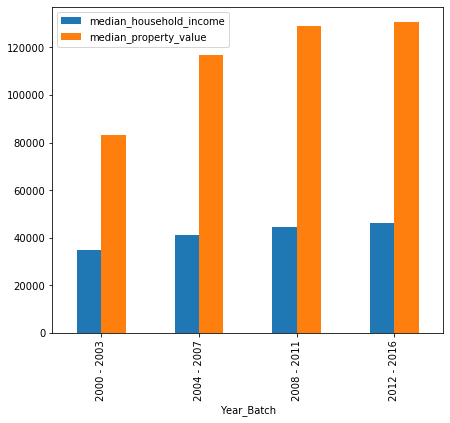

In [50]:
counties_us.groupby('Year_Batch')[['median_household_income', 'median_property_value']\
                                ].mean().plot(kind = 'bar', figsize = (7, 6))

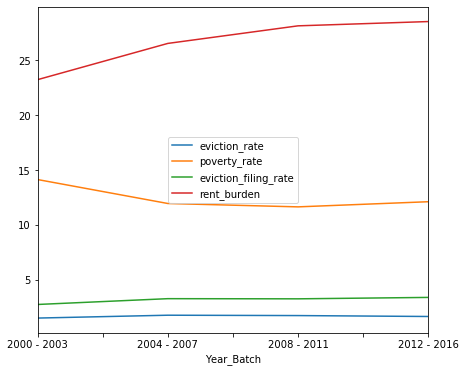

In [51]:
counties_us.groupby('Year_Batch')[['eviction_rate', 'poverty_rate', 'eviction_filing_rate', 'rent_burden']\
                                ].mean().plot(kind = 'line', figsize = (7, 6))

Eviction rate with poverty and income
-----

#correlation
----

In [52]:
corr = counties_us.loc[:,['eviction_rate',"poverty_rate", 'rent_burden','pct_white',
 'pct_af_am','median_household_income']].corr()

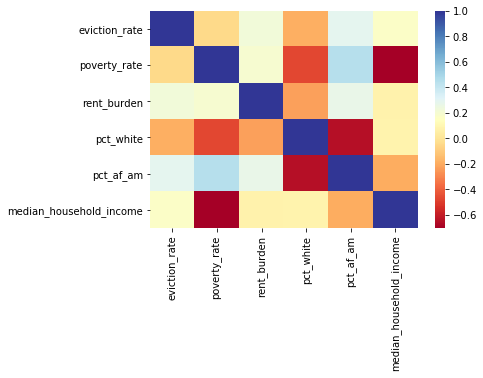

In [53]:
sns.heatmap(corr, cmap="RdYlBu")

# Eviction_rate with Features

#poverty and income
----

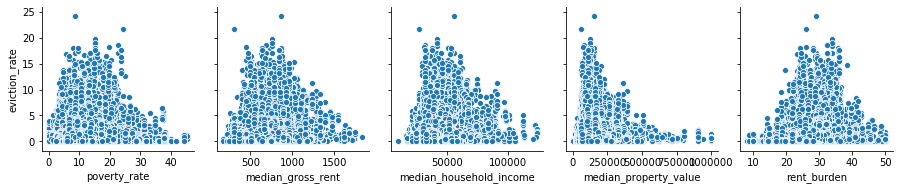

In [54]:
sns.pairplot(data=counties_us, y_vars=['eviction_rate'],
                  x_vars=['poverty_rate', 'median_gross_rent',
       'median_household_income', 'median_property_value', 'rent_burden'])

#Race
----

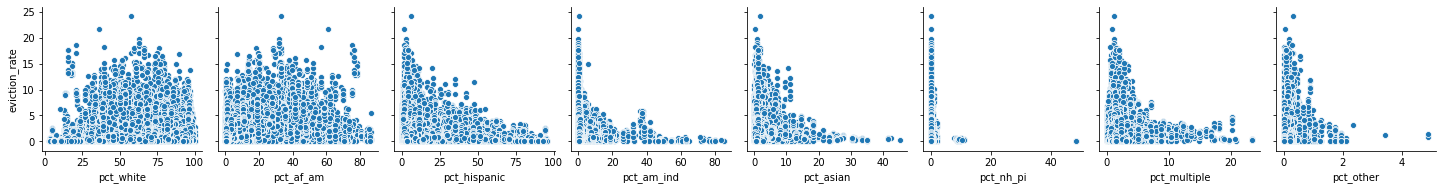

In [55]:
sns.pairplot(data=counties_us, y_vars=['eviction_rate'],
                  x_vars=['pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind', 'pct_asian',
       'pct_nh_pi', 'pct_multiple', 'pct_other'])

#Renter household num
----

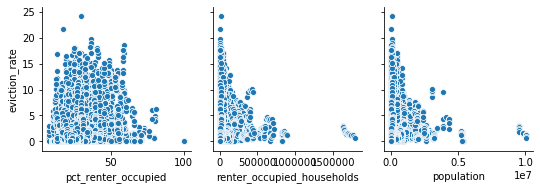

In [56]:
sns.pairplot(data=counties_us, y_vars=['eviction_rate'],
                  x_vars=['pct_renter_occupied','renter_occupied_households','population'])

# Feature Selection

In [57]:
counties_us.columns

Index(['year', 'county', 'state', 'population', 'poverty_rate',
       'renter_occupied_households', 'pct_renter_occupied',
       'median_gross_rent', 'median_household_income', 'median_property_value',
       'rent_burden', 'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind',
       'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other',
       'eviction_filings', 'evictions', 'eviction_rate',
       'eviction_filing_rate', 'Year_Batch'],
      dtype='object')

In [58]:
#creating dummies

counties_us_dummy = pd.get_dummies(counties_us[['state', 'year']]).reset_index(drop = True)

In [59]:
pd.options.display.max_columns = 100
counties_us_dummy.head()

,year,state_Alabama,state_Arizona,state_California,state_Colorado,state_Connecticut,state_Delaware,state_District of Columbia,state_Florida,state_Georgia,state_Hawaii,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Kansas,state_Kentucky,state_Louisiana,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Mississippi,state_Missouri,state_Montana,state_Nebraska,state_Nevada,state_New Hampshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_Ohio,state_Oklahoma,state_Oregon,state_Pennsylvania,state_Rhode Island,state_South Carolina,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,2001,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2002,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2003,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2004,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2005,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
#normalizing...

col_list = ['poverty_rate', 'pct_renter_occupied', 'median_gross_rent',\
       'median_household_income', 'median_property_value', 'rent_burden',\
       'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind', 'pct_asian',\
       'pct_nh_pi', 'pct_multiple', 'pct_other', 'renter_occupied_households']

counties_us_norm = preprocessing.normalize(counties_us[col_list], axis = 0)


counties_us_norm = pd.DataFrame(counties_us_norm, columns = col_list)

In [61]:
counties_us_norm.head()

,poverty_rate,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,renter_occupied_households
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [62]:
counties_us_norm.head()

,poverty_rate,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,renter_occupied_households
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [63]:
#combiniding both dummy and normalized data back again as X_train (train) and X_test (test)
# y_train/ y_test as target

X = pd.concat([counties_us_norm,counties_us_dummy], axis = 1)
y = counties_us.eviction_rate

In [64]:
#Spliting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting model - Logistic Regression

In [65]:
from sklearn.linear_model import LinearRegression

In [77]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
linreg.score(X_test, y_test)

0.4534825344039475

In [79]:
y_pred = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)


print(" Evaluation of Training Set:\n r2_score\t{},\n explained_variance_score\t{},\n mean_absolute_error\t{},\n mean_squared_error\t{}.\n".format(r2_score(y_train, y_pred_train), \
                                                                                                                explained_variance_score(y_train, y_pred_train),\
                                                                                                                mean_absolute_error(y_train, y_pred_train),\
                                                                                                                mean_squared_error(y_train, y_pred_train)))


print(" Evaluation of Test Set:\n r2_score\t{},\n explained_variance_score\t{},\n mean_absolute_error\t{},\n mean_squared_error\t{}.\n".format(r2_score(y_test, y_pred), \
                                                                                                                explained_variance_score(y_test, y_pred),\
                                                                                                                mean_absolute_error(y_test, y_pred),\
                                                                                                                mean_squared_error(y_test, y_pred)))

 Evaluation of Training Set:
 r2_score	0.44439594311706043,
 explained_variance_score	0.4443959431170603,
 mean_absolute_error	0.9859495884818646,
 mean_squared_error	2.1846431758686977.

 Evaluation of Test Set:
 r2_score	0.4534825344039475,
 explained_variance_score	0.4535573246347192,
 mean_absolute_error	0.9788694943404825,
 mean_squared_error	2.089550023223439.



# Prediction with Xgboost:

In [69]:
import xgboost as xgb

xgtrain = xgb.DMatrix(X_train.values, y_train.values)
xgtest = xgb.DMatrix(X_test.values, y_test.values)
evallist = [(xgtrain, 'train'),(xgtest, 'eval'),]

In [70]:
param = {'silent': 1, 'max_depth': 5,'min_child_weight': 4,\
         'learning_rates': 0.05, 'alpha':1.5, 'lambda':0.5, 'objective':'reg:linear'}
num_boost_round = 100
bst = xgb.train(param, xgtrain, num_boost_round, evallist, early_stopping_rounds=10)

[0]	train-rmse:1.89624	eval-rmse:1.87384
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:1.63837	eval-rmse:1.61439
[2]	train-rmse:1.49362	eval-rmse:1.46812
[3]	train-rmse:1.39366	eval-rmse:1.36623
[4]	train-rmse:1.32161	eval-rmse:1.29806
[5]	train-rmse:1.28227	eval-rmse:1.26304
[6]	train-rmse:1.24068	eval-rmse:1.22904
[7]	train-rmse:1.21288	eval-rmse:1.20653
[8]	train-rmse:1.19781	eval-rmse:1.19171
[9]	train-rmse:1.18074	eval-rmse:1.17718
[10]	train-rmse:1.16449	eval-rmse:1.16426
[11]	train-rmse:1.14339	eval-rmse:1.14882
[12]	train-rmse:1.13094	eval-rmse:1.13857
[13]	train-rmse:1.12512	eval-rmse:1.13292
[14]	train-rmse:1.11211	eval-rmse:1.12736
[15]	train-rmse:1.10452	eval-rmse:1.12172
[16]	train-rmse:1.09955	eval-rmse:1.11719
[17]	train-rmse:1.09248	eval-rmse:1.11084
[18]	train-rmse:1.08880	eval-rmse:1.10753
[19]	train-rmse:1.08397	eval-rmse:1.10229
[20]	train-rmse:1.07966	eva

In [71]:
X_dtest = xgb.DMatrix(X_test.values)
X_dtrain = xgb.DMatrix(X_train.values)
y_pred = bst.predict(X_dtest)
y_pred_train = bst.predict(X_dtrain)

print(" Evaluation of Training Set:\n r2_score\t{},\n explained_variance_score\t{},\n mean_absolute_error\t{},\n mean_squared_error\t{}.\n".format(r2_score(y_train, y_pred_train), \
                                                                                                                explained_variance_score(y_train, y_pred_train),\
                                                                                                                mean_absolute_error(y_train, y_pred_train),\
                                                                                                                mean_squared_error(y_train, y_pred_train)))


print(" Evaluation of Test Set:\n r2_score\t{},\n explained_variance_score\t{},\n mean_absolute_error\t{},\n mean_squared_error\t{}.\n".format(r2_score(y_test, y_pred), \
                                                                                                                explained_variance_score(y_test, y_pred),\
                                                                                                                mean_absolute_error(y_test, y_pred),\
                                                                                                                mean_squared_error(y_test, y_pred)))


 Evaluation of Training Set:
 r2_score	0.8329992875850695,
 explained_variance_score	0.8329992921213127,
 mean_absolute_error	0.5453586585016614,
 mean_squared_error	0.6566492130912509.

 Evaluation of Test Set:
 r2_score	0.7849452501673593,
 explained_variance_score	0.7849523874112131,
 mean_absolute_error	0.6042769634253177,
 mean_squared_error	0.822238420170173.



In [72]:
model_xgb = xgb.XGBRegressor(max_depth = 5,  min_child_weight = 4, n_estimators=40,\
                             silent=True, objective='reg:linear', gamma = 1, \
                            booster='gbtree', subsample=1,colsample_bytree=1, \
                              reg_alpha = 1.5, reg_lamba = 0.5, \
                             base_score=0.1, random_state=0)

param_grid = {'learning_rate': [x/10 for x in range(1,5,1)]
             }
scorer = make_scorer(mean_squared_error)
xgb_search = GridSearchCV(estimator = model_xgb, param_grid = param_grid, cv=5, scoring=scorer)
xgb_search.fit(X_train,y_train)
y_pred = xgb_search.best_estimator_.predict(X_test)

In [73]:
xgb_search.best_params_

{'learning_rate': 0.1}

In [74]:
y_pred = xgb_search.best_estimator_.predict(X_test)
y_pred_train = xgb_search.best_estimator_.predict(X_train)

print(" Evaluation of Training Set:\n r2_score\t{},\n explained_variance_score\t{},\n mean_absolute_error\t{},\n mean_squared_error\t{}.\n".format(r2_score(y_train, y_pred_train), \
                                                                                                                explained_variance_score(y_train, y_pred_train),\
                                                                                                                mean_absolute_error(y_train, y_pred_train),\
                                                                                                                mean_squared_error(y_train, y_pred_train)))


print(" Evaluation of Test Set:\n r2_score\t{},\n explained_variance_score\t{},\n mean_absolute_error\t{},\n mean_squared_error\t{}.\n".format(r2_score(y_test, y_pred), \
                                                                                                                explained_variance_score(y_test, y_pred),\
                                                                                                                mean_absolute_error(y_test, y_pred),\
                                                                                                                mean_squared_error(y_test, y_pred)))

 Evaluation of Training Set:
 r2_score	0.6738143186554657,
 explained_variance_score	0.6739598526628473,
 mean_absolute_error	0.7591033388807944,
 mean_squared_error	1.2825668099208214.

 Evaluation of Test Set:
 r2_score	0.6671198302416814,
 explained_variance_score	0.6671468609407929,
 mean_absolute_error	0.7690874222786713,
 mean_squared_error	1.2727310840660915.



Text(0.5, 1.0, 'Feature Importances')

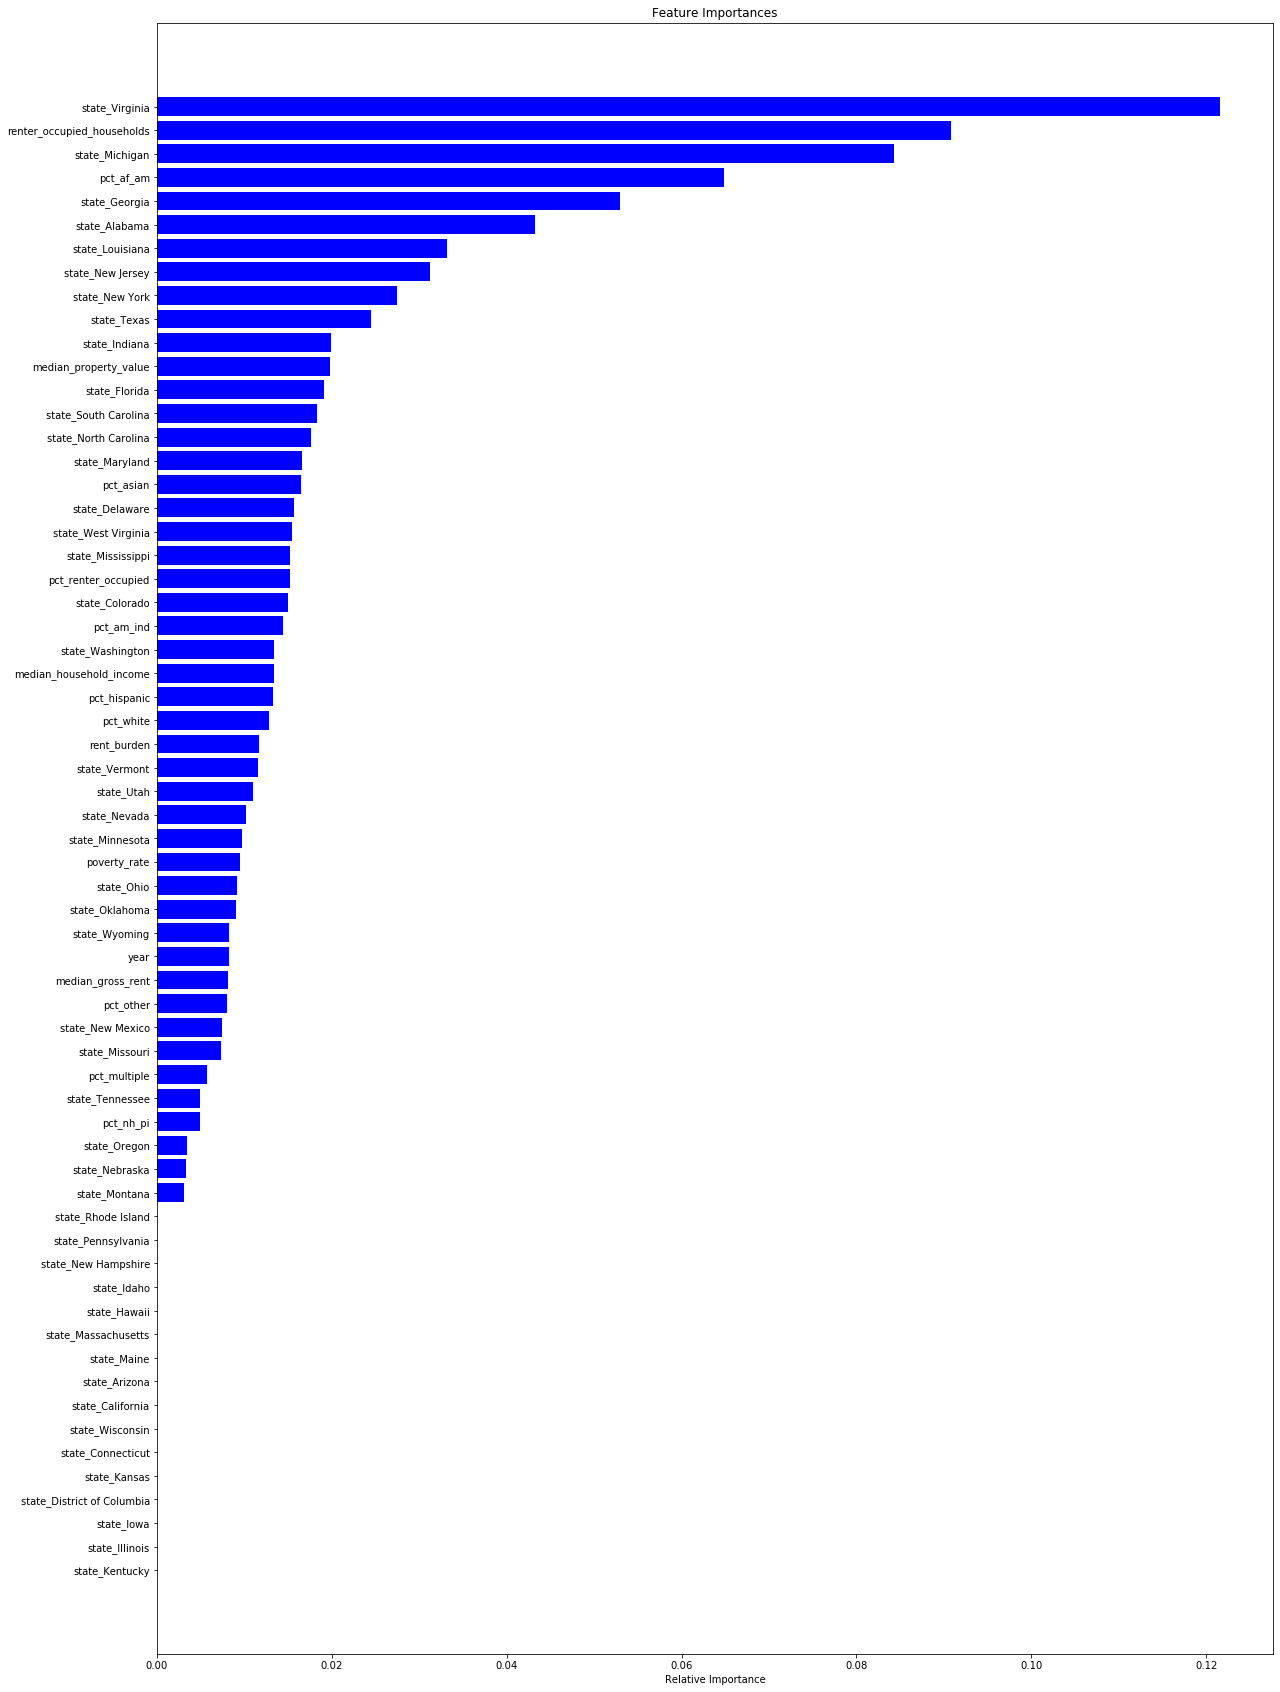

In [75]:
features = X.columns
importances = xgb_search.best_estimator_.feature_importances_
indices = np.argsort(importances)


plt.figure(figsize = (20,30))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances')

In [76]:

model = xgb.XGBRegressor(max_depth=5, learning_rate=0.1, gamma = 1, min_child_weight=4, \
                         reg_alpha = 1.5, reg_lambda = 0.5,n_estimators=400, silent=False, base_score = 0.1, \
                         subsample=1, colsample_bytree=1,
                         objective='reg:linear', booster='gbtree')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print(" Evaluation of Training Set:\n r2_score\t{},\n explained_variance_score\t{},\n mean_absolute_error\t{},\n mean_squared_error\t{}.\n".format(r2_score(y_train, y_pred_train), \
                                                                                                                explained_variance_score(y_train, y_pred_train),\
                                                                                                                mean_absolute_error(y_train, y_pred_train),\
                                                                                                                mean_squared_error(y_train, y_pred_train)))


print(" Evaluation of Test Set:\n r2_score\t{},\n explained_variance_score\t{},\n mean_absolute_error\t{},\n mean_squared_error\t{}.\n".format(r2_score(y_test, y_pred), \
                                                                                                                explained_variance_score(y_test, y_pred),\
                                                                                                                mean_absolute_error(y_test, y_pred),\
                                                                                                                mean_squared_error(y_test, y_pred)))

[00:58:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
 Evaluation of Training Set:
 r2_score	0.8501844117693139,
 explained_variance_score	0.8501844126375258,
 mean_absolute_error	0.5147195217758508,
 mean_squared_error	0.5890770566059433.

 Evaluation of Test Set:
 r2_score	0.8016487095837224,
 explained_variance_score	0.8016551885984624,
 mean_absolute_error	0.5798192600079115,
 mean_squared_error	0.7583745618151488.

